In [26]:
# Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sweetviz as sv
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Lecture des données
data = pd.read_csv('Housing.csv')

In [4]:
# Voir un aperçu 
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Voir les infos du dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# Nbre de lignes et de colonnes

lignes = data.shape[0]
colonnes = data.shape[1]
print(f"Il y'a  {lignes} lignes et {colonnes} colonnes. ")

Il y'a  545 lignes et 13 colonnes. 


In [7]:
# Verifier si il y'a des valeurs nulles ou manquantes
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
# Verifier s'il y'a des valeurs en doubles

double = data.duplicated().any()

if double == False:
    print("Il n'y a pas de lignes doubles .")
else:
    print("Il y' des lignes qui se répètent.")

Il n'y a pas de lignes doubles .


In [11]:
# Pour voir toutes les colonnes sous forme de liste
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

### EDA

In [13]:
# Make a report with sweetviz library
my_report = sv.analyze([data, "House Analysis"], target_feat="price")

# Enregistrez le rapport dans un fichier HTML
my_report.show_html("mon_rapport_house_analysis.html")

                                             |                                             | [  0%]   00:00 ->…

Report mon_rapport_house_analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Make Our Model

In [14]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [44]:
#Combien de valeurs uniques avons nous dans les variables catégorielles
for x in data.select_dtypes('object'):
    print(data[x].unique())
print(data['parking'].unique())

['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['furnished' 'semi-furnished' 'unfurnished']
[2 3 0 1]


In [35]:
data.head()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [39]:
data.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Appliquer le LabelEncoder sur chaque variable catégorielles
for x in data.select_dtypes('object'):
    data[x] = le.fit_transform(data[x])

In [46]:
data.head()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,4,2,3,1,0,0,0,1,2,1,0
1,12250000,4,4,4,1,0,0,0,1,3,0,0
2,12250000,3,2,2,1,0,1,0,0,2,1,1
3,12215000,4,2,2,1,0,1,0,1,3,1,0
4,11410000,4,1,2,1,1,1,0,1,2,0,0


In [48]:
# Maintenant on peut calculer la matrice de corrélation 
matrice_corr = data.corr()

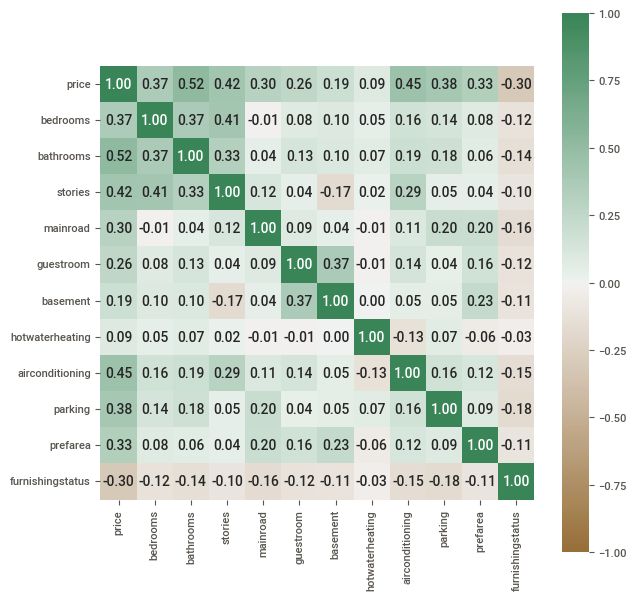

In [51]:
# Visualiser la matrice de correlation avec un heatmap de seaborn

plt.figure(figsize=(7,7))
sns.heatmap(matrice_corr,annot=True,cmap=sns.diverging_palette(50,500,n=500),
            fmt='.2f',vmax=1,vmin=-1,center=0,square=True)
plt.show()

In [52]:
data.head()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,4,2,3,1,0,0,0,1,2,1,0
1,12250000,4,4,4,1,0,0,0,1,3,0,0
2,12250000,3,2,2,1,0,1,0,0,2,1,1
3,12215000,4,2,2,1,0,1,0,1,3,1,0
4,11410000,4,1,2,1,1,1,0,1,2,0,0


In [120]:
# Variables independantes X, variable dependante Y
X = data.iloc[:,1:]
y  = data.iloc[:,0]

In [121]:
print(f"La taille de X est : {X.shape[0]} lignes et {X.shape[1]} colonnes ")
print(f"La taille de y est : {y.shape} lignes")

La taille de X est : 545 lignes et 11 colonnes 
La taille de y est : (545,) lignes


In [122]:
X.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4,2,3,1,0,0,0,1,2,1,0
1,4,4,4,1,0,0,0,1,3,0,0
2,3,2,2,1,0,1,0,0,2,1,1
3,4,2,2,1,0,1,0,1,3,1,0
4,4,1,2,1,1,1,0,1,2,0,0


In [98]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [123]:
#Separer les données d'entraînement et de test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [124]:
# On va selectionner les variables en utilisant la metode features importance
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

In [125]:
model.fit(X,y)

ExtraTreesRegressor()

In [102]:
# Afficher les variables importantes
print(model.feature_importances_)

[0.07239952 0.21957178 0.09112804 0.0435449  0.04299377 0.04331925
 0.02386958 0.19110528 0.11789684 0.07209849 0.08207256]


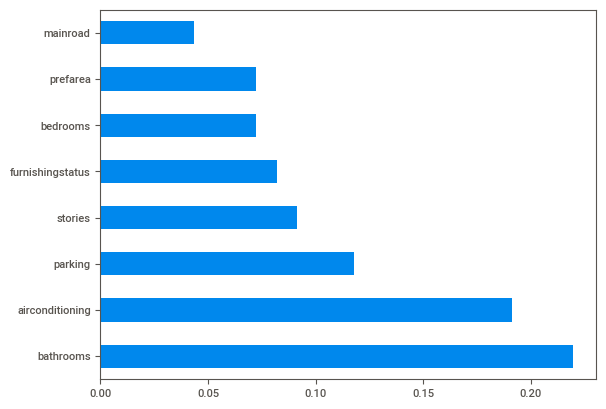

In [103]:
#Tracer un graphe de variables importantes pour une meilleure visualisation

feat_import = pd.Series(model.feature_importances_,index=X.columns)
feat_import.nlargest(8).plot(kind='barh')
plt.show()

In [126]:
X.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4,2,3,1,0,0,0,1,2,1,0
1,4,4,4,1,0,0,0,1,3,0,0
2,3,2,2,1,0,1,0,0,2,1,1
3,4,2,2,1,0,1,0,1,3,1,0
4,4,1,2,1,1,1,0,1,2,0,0


In [127]:
# IMPLEMENTATION DU MODEL RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest

RandomForestRegressor()

In [128]:
#Fit the model

random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [129]:
#Make a prediction
prediction = random_forest.predict(X_test)
print(prediction)

[5669720.         7473456.66666667 3616187.60683761 4357146.5
 4197742.5        3428203.29248366 4741128.66666667 5421745.
 3215857.33333333 2503394.16666667 9492140.         2852022.55880785
 3147407.66666667 3350144.16666667 3492051.44444444 6502696.66666667
 3335517.63888889 3793528.16666667 3205774.44444444 3616187.60683761
 5775105.         5664190.         2852022.55880785 4751296.66666667
 5713353.33333333 5542582.5        4873387.10526316 4957125.83333333
 6223338.33333333 3375307.91666667 7544390.         2922866.01262626
 6373780.         3895508.58333333 2566012.33333333 6674826.66666667
 4687135.83333333 4162224.5        3134917.83333333 4907134.16666667
 4683093.33333333 3013955.44871795 7473456.66666667 4557255.5
 3616187.60683761 3844104.16666667 6918730.         4490210.66666667
 2852022.55880785 3856377.         7332755.64       2938329.64141414
 3601306.25       4557560.         3542985.         2503394.16666667
 7312690.         3164467.01689977 3983306.66666667 2852

In [130]:
# Voir le score
random_forest.score(X_train,y_train)

0.9109946154679394

<Axes: xlabel='price', ylabel='Density'>

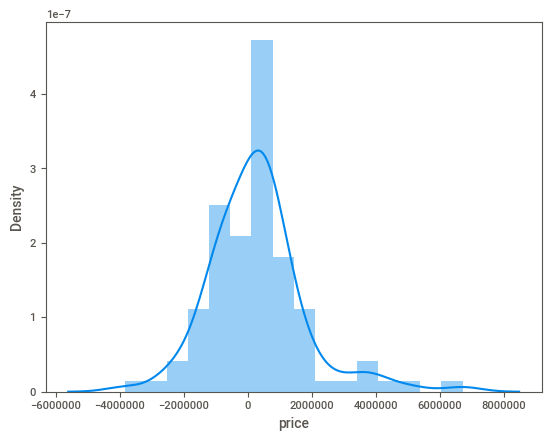

In [131]:
sns.distplot(y_test - prediction)

### AJUSTER LES HYPERPARAMÈTRES

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [133]:
# Créez un RandomForestRegressor
rf_model = RandomForestRegressor()

# Définissez la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [10, 50, 100, 200,60],
    'max_depth': [None, 10, 20, 30,40],
    'min_samples_split': [2, 5, 10,15,20,4],
    'min_samples_leaf': [1, 2, 4,5,7,8]
}

In [134]:
# Utiliser la recherche sur grille pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 5, 7, 8],
                         'min_samples_split': [2, 5, 10, 15, 20, 4],
                         'n_estimators': [10, 50, 100, 200, 60]},
             scoring='neg_mean_squared_error')

In [135]:
# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)


Meilleurs hyperparamètres: {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


In [136]:
# Faire des prédictions sur l'ensemble de test avec le modèle optimisé
y_pred = grid_search.best_estimator_.predict(X_test)

In [149]:
# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error sur l'ensemble de test:", mse)

Mean Squared Error sur l'ensemble de test: 2389826553520.4214


In [150]:
# Obtenez le score R²
score = rf_model.score(X_test, y_test)

print("Score sur l'ensemble de test:", score)

Score sur l'ensemble de test: 0.5518008423266694


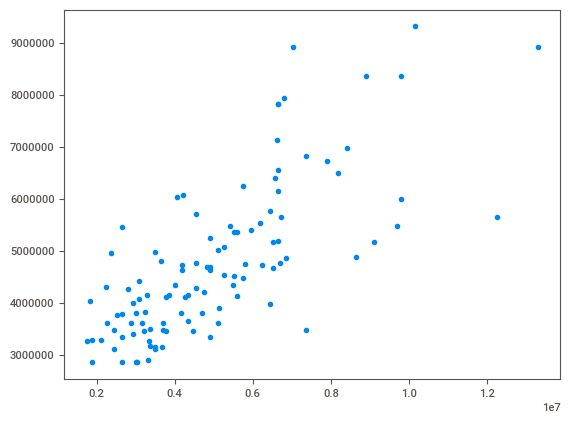

In [153]:
plt.scatter(y_test,y_pred)

In [154]:
#Enregistrer le modele
import pickle
file = open('random_forest_regression_model_house_pred.pkl','wb')
#dump information to that file
pickle.dump(rf_model,file)

In [155]:
X.columns

Index(['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')